In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load and preprocess data
chatgpt_results_4o = pd.read_csv('Data/final_classified_gpt4o.csv')
chatgpt_results_3 = pd.read_csv('Data/final_classified_gpt3turbo.csv')
chatgpt_results_4 = pd.read_csv('Data/final_classified_gpt-4-turbo.csv') 
labels = pd.read_csv('Data/final.csv')
examples_df = pd.read_csv('Data/examples_chatgpt.csv')

In [4]:
# comparison_df =  pd.read_csv('Data/comparison_df_gpt3_5')
# comparison_df_2 = pd.read_csv('/Users/nilanshadargan/Desktop/masters_thesis-main/masters_thesis/Data/comparison_df_gpt4o')
# comparison_df_3 = pd.read_csv('Data/comparison_df_gpt4')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/nilanshadargan/Desktop/masters_thesis-main/masters_thesis/Data/comparison_df_gpt4o'

In [6]:
# Check Nan values
example_company_ids = examples_df['company_id'].tolist()
labels_filtered = labels[~labels['company_id'].isin(example_company_ids)]

In [7]:
# Delete extra company
chatgpt_results_4o = chatgpt_results_4o[chatgpt_results_4o['company_name'] != 'BeGo']
chatgpt_results_3 = chatgpt_results_3[chatgpt_results_3['company_name'] != 'BeGo']
chatgpt_results_4 = chatgpt_results_4[chatgpt_results_4['company_name'] != 'BeGo']
labels_filtered = labels_filtered[labels_filtered['company_name'] != 'BeGo']

In [8]:
# Correct miscategorised labels in GPT 3
chatgpt_results_3.at[3, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_3.at[3, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_3.at[7, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[11, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[11, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_3.at[13, 'UVP'] = np.nan
chatgpt_results_3.at[16, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_3.at[17, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[23, 'UVP'] = np.nan
chatgpt_results_3.at[36, 'Data Uniqueness'] = 'Quantity questionable'
chatgpt_results_3.at[41, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_3.at[58, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_3.at[76, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[82, 'Data Uniqueness'] = 'Quantity questionable'
chatgpt_results_3.at[87, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_3.at[96, 'UVP'] = 'Ok for 1-2 years'

In [9]:
true_labels = labels_filtered[['company_id', 'UVP', 'Data Uniqueness']]

In [10]:
predicted_labels_1 = chatgpt_results_3[['company_id', 'UVP', 'Data Uniqueness']]

In [11]:
predicted_labels_1.drop(predicted_labels_1[predicted_labels_1['UVP'].isna() & predicted_labels_1['Data Uniqueness'].isna()].index, inplace=True)

/var/folders/v9/qq898c510kxf08v1np8328600000gn/T/ipykernel_73330/206974209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_labels_1.drop(predicted_labels_1[predicted_labels_1['UVP'].isna() & predicted_labels_1['Data Uniqueness'].isna()].index, inplace=True)


In [12]:
predicted_labels_1

,company_id,UVP,Data Uniqueness
0,28367.0,Ok for 3-5 years,Not Special/Publicly Available
1,27989.0,Ok for 3-5 years,Not Special/Publicly Available
2,27966.0,Ok for 3-5 years,Large/Difficult to Obtain
3,27943.0,Ok for 3-5 years,Large/Difficult to Obtain
4,27890.0,Ok for 3-5 years,Large/Difficult to Obtain
...,...,...,...
98,13348.0,Ok for 3-5 years,Large/Difficult to Obtain
100,13218.0,Ok for 3-5 years,Large/Difficult to Obtain
101,13147.0,Already obsolete,Large/Difficult to Obtain
102,13144.0,Ok for 3-5 years,Large/Difficult to Obtain


In [13]:
# Comparison dataset of predicted and true labels for GPT 3
comparison_df = pd.merge(
    true_labels[['company_id', 'UVP', 'Data Uniqueness']],
    predicted_labels_1[['company_id', 'UVP', 'Data Uniqueness']],
    on='company_id',
    suffixes=('_true', '_predicted')
)

comparison_df.fillna('N/A', inplace=True)

In [14]:
comparison_df

,company_id,UVP_true,Data Uniqueness_true,UVP_predicted,Data Uniqueness_predicted
0,28367,Ok for 3-5 years,N/A,Ok for 3-5 years,Not Special/Publicly Available
1,27989,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
2,27966,Ok for 5-8 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
3,27943,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Large/Difficult to Obtain
4,27890,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
...,...,...,...,...,...
94,13348,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
95,13218,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain
96,13147,Ok for 1-2 years,Not Special/Publicly Available,Already obsolete,Large/Difficult to Obtain
97,13144,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain


In [15]:
comparison_df['Data Uniqueness_true'] = comparison_df['Data Uniqueness_true'].replace('Quantity questionable', 'Questionable Quantity')

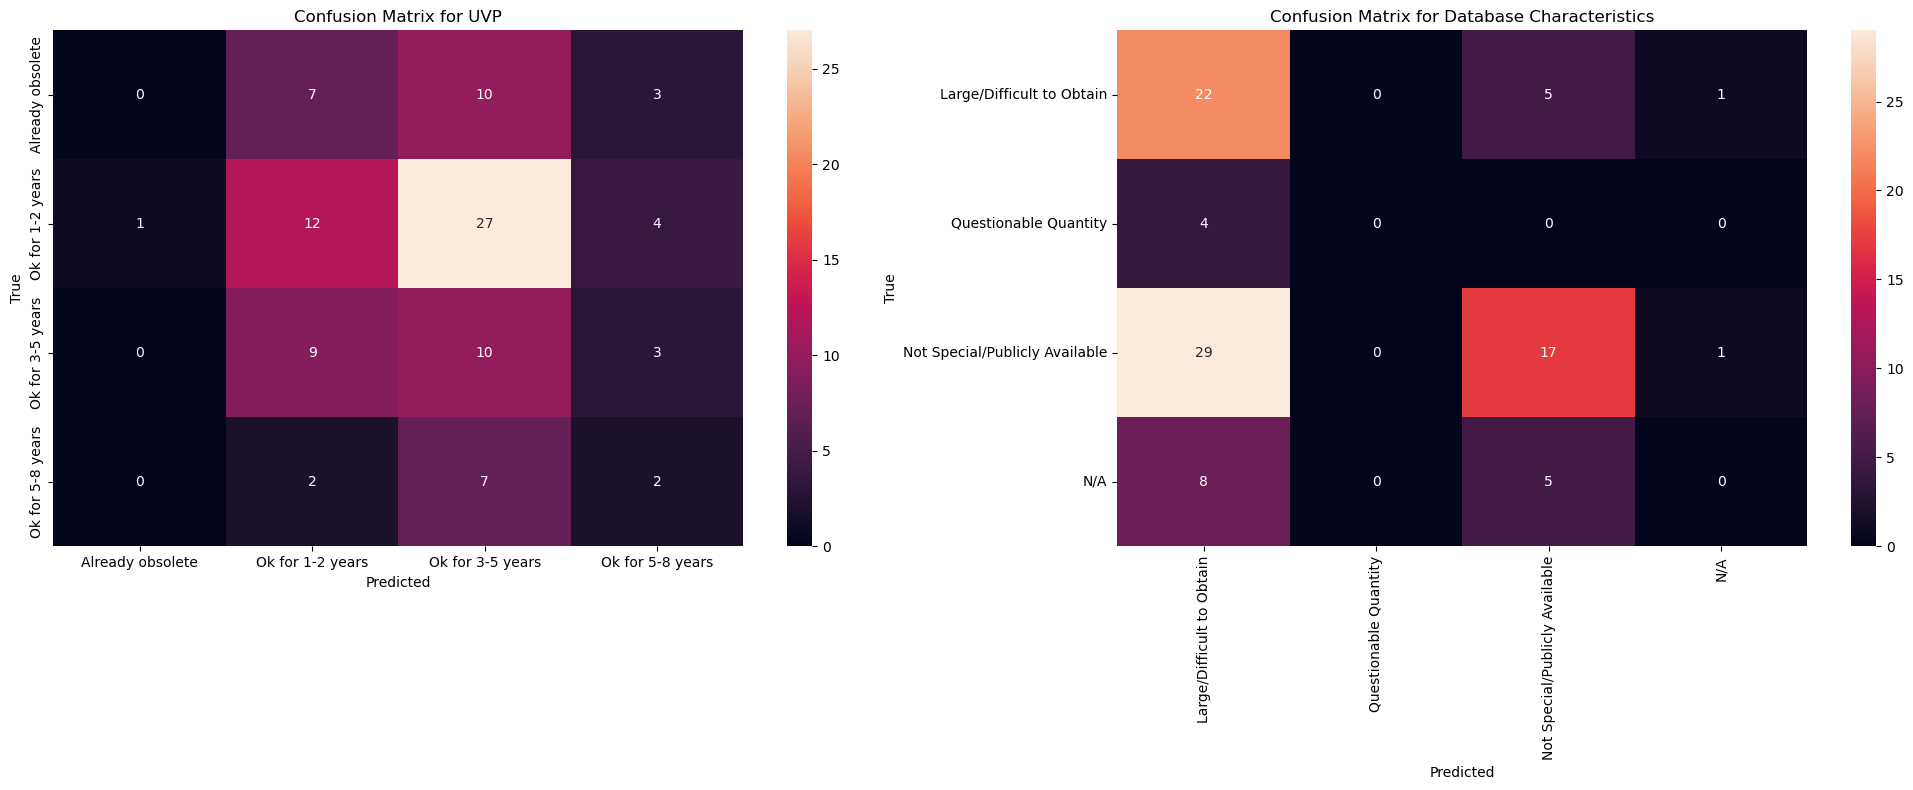

In [16]:
# Unique Value Proposition (UVP) confusion matrix
uvp_true = comparison_df['UVP_true']
uvp_pred = comparison_df['UVP_predicted']
uvp_labels = ["Already obsolete", "Ok for 1-2 years", "Ok for 3-5 years", "Ok for 5-8 years"]
uvp_confusion_matrix = confusion_matrix(uvp_true, uvp_pred, labels=uvp_labels)

# Database Characteristics confusion matrix
data_true = comparison_df['Data Uniqueness_true']
data_pred = comparison_df['Data Uniqueness_predicted']
data_labels = ["Large/Difficult to Obtain", "Questionable Quantity", "Not Special/Publicly Available", "N/A"]
data_confusion_matrix = confusion_matrix(data_true, data_pred, labels=data_labels)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(uvp_confusion_matrix, annot=True, fmt='d', xticklabels=uvp_labels, yticklabels=uvp_labels, ax=ax[0])
ax[0].set_title('Confusion Matrix for UVP')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(data_confusion_matrix, annot=True, fmt='d', xticklabels=data_labels, yticklabels=data_labels, ax=ax[1])
ax[1].set_title('Confusion Matrix for Database Characteristics')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [18]:
accuracy_uvp_gpt3_5 = accuracy_score(comparison_df['UVP_true'], comparison_df['UVP_predicted'])
accuracy_uvp_gpt3_5

0.24242424242424243

In [19]:
accuracy_du_gpt3_5 = accuracy_score(comparison_df['Data Uniqueness_true'], comparison_df['Data Uniqueness_predicted'])
accuracy_du_gpt3_5

0.3939393939393939

In [20]:
comparison_df.to_csv('Data/comparison_df_gpt3_5', index=False) 

In [22]:
# Correct miscategorised labels in GPT 4o
chatgpt_results_4o.at[3, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4o.at[9, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4o.at[9, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4o.at[21, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[21, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[32, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4o.at[32, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[32, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[32, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[44, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[44, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4o.at[45, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[45, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[54, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4o.at[54, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[62, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4o.at[62, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[69, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[69, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[87, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[87, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4o.at[95, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4o.at[95, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[98, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[98, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4o.at[99, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[99, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[101, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4o.at[101, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4o.at[103, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4o.at[103, 'Data Uniqueness'] = 'Not Special/Publicly Available'

In [23]:
predicted_labels_2 = chatgpt_results_4o[['company_id', 'UVP', 'Data Uniqueness']]

In [24]:
predicted_labels_2.drop(predicted_labels_2[predicted_labels_2['UVP'].isna() & predicted_labels_2['Data Uniqueness'].isna()].index, inplace=True)

/var/folders/v9/qq898c510kxf08v1np8328600000gn/T/ipykernel_73330/3450440125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_labels_2.drop(predicted_labels_2[predicted_labels_2['UVP'].isna() & predicted_labels_2['Data Uniqueness'].isna()].index, inplace=True)


In [25]:
predicted_labels_2

,company_id,UVP,Data Uniqueness
0,28367.0,Ok for 3-5 years,Not Special/Publicly Available
1,27989.0,Ok for 3-5 years,Not Special/Publicly Available
2,27966.0,Ok for 3-5 years,Not Special/Publicly Available
3,27943.0,NaN,Large/Difficult to Obtain
4,27890.0,Ok for 3-5 years,Not Special/Publicly Available
...,...,...,...
99,13224.0,Ok for 3-5 years,Not Special/Publicly Available
100,13218.0,Ok for 5-8 years,Large/Difficult to Obtain
101,13147.0,Ok for 1-2 years,Not Special/Publicly Available
102,13144.0,Ok for 3-5 years,Large/Difficult to Obtain


In [26]:
# Comparison dataset of predicted and true labels for GPT 4o
comparison_df_2 = pd.merge(
    true_labels[['company_id', 'UVP', 'Data Uniqueness']],
    predicted_labels_2[['company_id', 'UVP', 'Data Uniqueness']],
    on='company_id',
    suffixes=('_true', '_predicted')
)

comparison_df_2.fillna('N/A', inplace=True)

In [27]:
comparison_df_2

,company_id,UVP_true,Data Uniqueness_true,UVP_predicted,Data Uniqueness_predicted
0,28367,Ok for 3-5 years,N/A,Ok for 3-5 years,Not Special/Publicly Available
1,27989,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
2,27966,Ok for 5-8 years,Large/Difficult to Obtain,Ok for 3-5 years,Not Special/Publicly Available
3,27943,Ok for 1-2 years,Not Special/Publicly Available,N/A,Large/Difficult to Obtain
4,27890,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 3-5 years,Not Special/Publicly Available
...,...,...,...,...,...
96,13224,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 3-5 years,Not Special/Publicly Available
97,13218,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain
98,13147,Ok for 1-2 years,Not Special/Publicly Available,Ok for 1-2 years,Not Special/Publicly Available
99,13144,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 3-5 years,Large/Difficult to Obtain


In [28]:
comparison_df_2['Data Uniqueness_true'] = comparison_df_2['Data Uniqueness_true'].replace('Quantity questionable', 'Questionable Quantity')

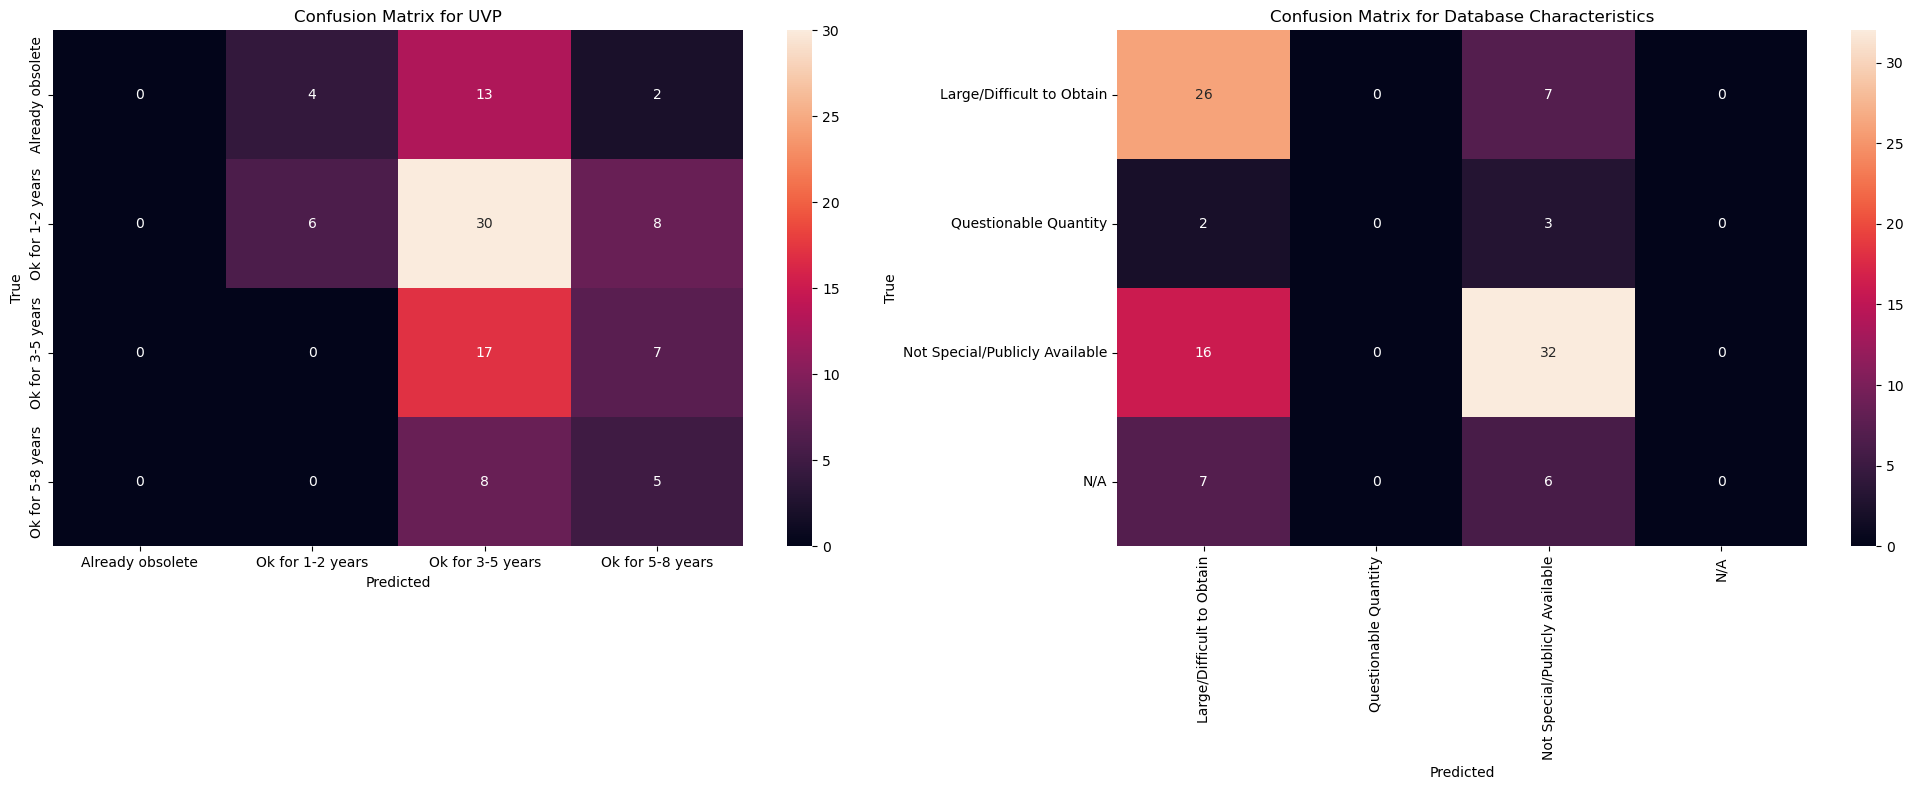

In [29]:
# Unique Value Proposition (UVP) confusion matrix
uvp_true = comparison_df_2['UVP_true']
uvp_pred = comparison_df_2['UVP_predicted']
uvp_labels = ["Already obsolete", "Ok for 1-2 years", "Ok for 3-5 years", "Ok for 5-8 years"]
uvp_confusion_matrix = confusion_matrix(uvp_true, uvp_pred, labels=uvp_labels)

# Database Characteristics confusion matrix
data_true = comparison_df_2['Data Uniqueness_true']
data_pred = comparison_df_2['Data Uniqueness_predicted']
data_labels = ["Large/Difficult to Obtain", "Questionable Quantity", "Not Special/Publicly Available", "N/A"]
data_confusion_matrix = confusion_matrix(data_true, data_pred, labels=data_labels)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(uvp_confusion_matrix, annot=True, fmt='d', xticklabels=uvp_labels, yticklabels=uvp_labels, ax=ax[0])
ax[0].set_title('Confusion Matrix for UVP')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(data_confusion_matrix, annot=True, fmt='d', xticklabels=data_labels, yticklabels=data_labels, ax=ax[1])
ax[1].set_title('Confusion Matrix for Database Characteristics')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [30]:
accuracy_uvp_gpt4o = accuracy_score(comparison_df_2['UVP_true'], comparison_df_2['UVP_predicted'])
accuracy_uvp_gpt4o

0.27722772277227725

In [31]:
accuracy_du_gpt4o = accuracy_score(comparison_df_2['Data Uniqueness_true'], comparison_df_2['Data Uniqueness_predicted'])
accuracy_du_gpt4o

0.5742574257425742

In [32]:
comparison_df_2.to_csv('Data/comparison_df_gpt4o', index=False)

In [33]:
# Correct miscategorised labels in GPT 4 turbo
chatgpt_results_4.at[1, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[1, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[5, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[5, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[11, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[11, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[13, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[13, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[14, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[14, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[15, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[15, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[19, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[19, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[20, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[20, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[25, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[25, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[27, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[27, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[29, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[29, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[30, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[30, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[31, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[31, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[32, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[32, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[35, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[35, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[36, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[36, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[38, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[38, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[39, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[39, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[40, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[40, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[43, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[43, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[45, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[45, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[51, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[51, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[54, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[55, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[61, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[61, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[62, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[62, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[65, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[65, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[76, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[76, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[77, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[77, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[84, 'UVP'] = 'Ok for 1-2 years'
chatgpt_results_4.at[84, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[85, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[85, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[86, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[86, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[94, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[94, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[95, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[95, 'Data Uniqueness'] = 'Large/Difficult to Obtain'
chatgpt_results_4.at[102, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[102, 'Data Uniqueness'] = 'Large/Difficult to Obtain'





chatgpt_results_4.at[3, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[17, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[18, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[23, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[24, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[42, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[44, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[46, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[48, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[53, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[58, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[63, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[64, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[80, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[91, 'Data Uniqueness'] = 'Not Special/Publicly Available'
chatgpt_results_4.at[93, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[96, 'UVP'] = 'Ok for 3-5 years'
chatgpt_results_4.at[99, 'UVP'] = 'Ok for 5-8 years'
chatgpt_results_4.at[100, 'UVP'] = 'Ok for 5-8 years'

In [34]:
predicted_labels_3 = chatgpt_results_4[['company_id', 'UVP', 'Data Uniqueness']]

In [35]:
predicted_labels_3.drop(predicted_labels_3[predicted_labels_3['UVP'].isna() & predicted_labels_3['Data Uniqueness'].isna()].index, inplace=True)

/var/folders/v9/qq898c510kxf08v1np8328600000gn/T/ipykernel_73330/2703382376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_labels_3.drop(predicted_labels_3[predicted_labels_3['UVP'].isna() & predicted_labels_3['Data Uniqueness'].isna()].index, inplace=True)


In [36]:
predicted_labels_3

,company_id,UVP,Data Uniqueness
0,28367.0,Ok for 5-8 years,Not Special/Publicly Available
1,27989.0,Ok for 3-5 years,Not Special/Publicly Available
2,27966.0,Ok for 5-8 years,Large/Difficult to Obtain
3,27943.0,Ok for 5-8 years,Large/Difficult to Obtain
4,27890.0,Ok for 5-8 years,Large/Difficult to Obtain
...,...,...,...
99,13224.0,Ok for 5-8 years,Large/Difficult to Obtain
100,13218.0,Ok for 5-8 years,Large/Difficult to Obtain
101,13147.0,Ok for 3-5 years,Not Special/Publicly Available
102,13144.0,Ok for 5-8 years,Large/Difficult to Obtain


In [37]:
# Comparison dataset of predicted and true labels for GPT 4 turbo
comparison_df_3 = pd.merge(
    true_labels[['company_id', 'UVP', 'Data Uniqueness']],
    predicted_labels_3[['company_id', 'UVP', 'Data Uniqueness']],
    on='company_id',
    suffixes=('_true', '_predicted')
)

comparison_df_3.fillna('N/A', inplace=True)

In [38]:
comparison_df_3

,company_id,UVP_true,Data Uniqueness_true,UVP_predicted,Data Uniqueness_predicted
0,28367,Ok for 3-5 years,N/A,Ok for 5-8 years,Not Special/Publicly Available
1,27989,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
2,27966,Ok for 5-8 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain
3,27943,Ok for 1-2 years,Not Special/Publicly Available,Ok for 5-8 years,Large/Difficult to Obtain
4,27890,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain
...,...,...,...,...,...
98,13224,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain
99,13218,Ok for 3-5 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain
100,13147,Ok for 1-2 years,Not Special/Publicly Available,Ok for 3-5 years,Not Special/Publicly Available
101,13144,Ok for 1-2 years,Large/Difficult to Obtain,Ok for 5-8 years,Large/Difficult to Obtain


In [39]:
comparison_df_3['Data Uniqueness_true'] = comparison_df_3['Data Uniqueness_true'].replace('Quantity questionable', 'Questionable Quantity')

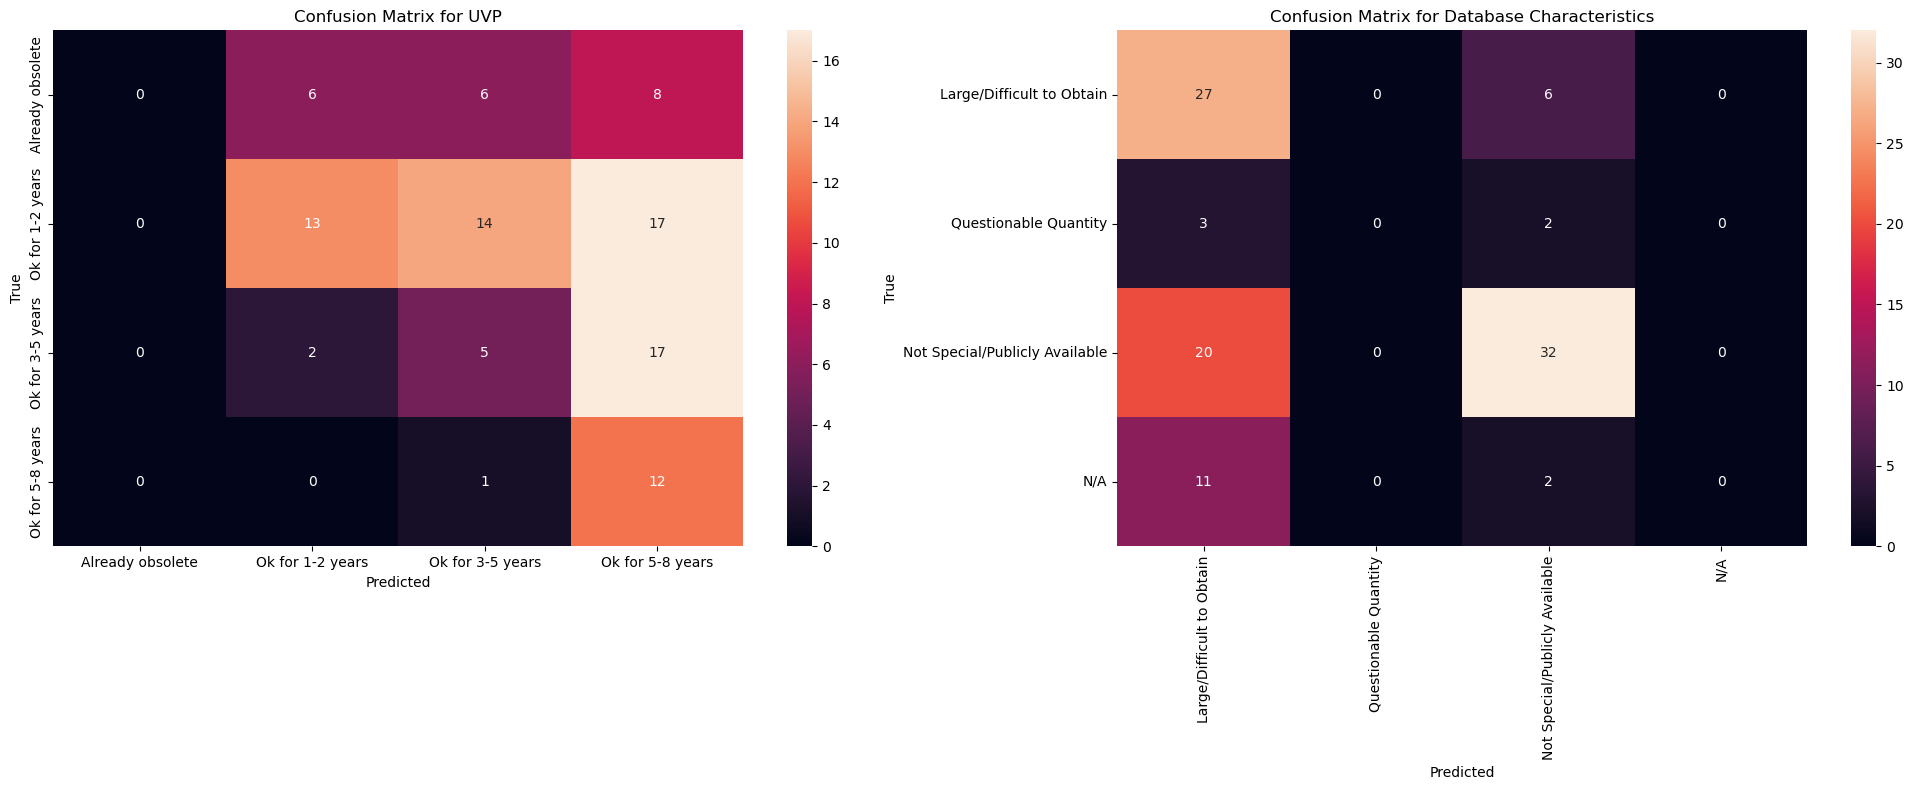

In [40]:
# Unique Value Proposition (UVP) confusion matrix
uvp_true = comparison_df_3['UVP_true']
uvp_pred = comparison_df_3['UVP_predicted']
uvp_labels = ["Already obsolete", "Ok for 1-2 years", "Ok for 3-5 years", "Ok for 5-8 years"]
uvp_confusion_matrix = confusion_matrix(uvp_true, uvp_pred, labels=uvp_labels)

# Database Characteristics confusion matrix
data_true = comparison_df_3['Data Uniqueness_true']
data_pred = comparison_df_3['Data Uniqueness_predicted']
data_labels = ["Large/Difficult to Obtain", "Questionable Quantity", "Not Special/Publicly Available", "N/A"]
data_confusion_matrix = confusion_matrix(data_true, data_pred, labels=data_labels)

# Plotting the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.heatmap(uvp_confusion_matrix, annot=True, fmt='d', xticklabels=uvp_labels, yticklabels=uvp_labels, ax=ax[0])
ax[0].set_title('Confusion Matrix for UVP')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('True')

sns.heatmap(data_confusion_matrix, annot=True, fmt='d', xticklabels=data_labels, yticklabels=data_labels, ax=ax[1])
ax[1].set_title('Confusion Matrix for Database Characteristics')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('True')

plt.tight_layout()
plt.show()

In [35]:
accuracy_uvp_gpt4 = accuracy_score(comparison_df_3['UVP_true'], comparison_df_3['UVP_predicted'])
accuracy_uvp_gpt4

0.2912621359223301

In [36]:
accuracy_du_gpt4 = accuracy_score(comparison_df_3['Data Uniqueness_true'], comparison_df_3['Data Uniqueness_predicted'])
accuracy_du_gpt4

0.5728155339805825

In [33]:
# comparison_df_3.to_csv('Data/comparison_df_gpt4', index=False)